In [100]:
#Load modules
import datacube
import numpy as np
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import sys
from datacube.storage import masking
from datacube.utils import geometry
from datacube.helpers import ga_pq_fuser, write_geotiff
from datacube.virtual import construct_from_yaml
import datacube

dc = datacube.Datacube()

In [101]:
def run_yaml_load(Thequery):
    prod = construct_from_yaml("""
    transform: expressions
    output:
        Fisher_index :
            formula: 1.7204 + ((171 * green) + (3 * red) - (70 * nir) - (45 * swir1) - (71 * swir2))/10000
            dtype: float32
            nodata: -999
        Wetness_Tasseled :
            formula: 0.0315 * blue + 0.2021 * green + 0.3102 * red + 0.1594 * nir + -0.6806 * swir1 + -0.6109 * swir2
            dtype: float32
            nodata: -999
    input:
        transform: apply_mask
        mask_measurement_name: pixelquality
        input:
            transform: make_mask
            flags:
                cloud_acca: no_cloud
                cloud_fmask: no_cloud
                cloud_shadow_acca: no_cloud_shadow
                cloud_shadow_fmask: no_cloud_shadow
                blue_saturated: False
                green_saturated: False
                red_saturated: False
                nir_saturated: False
                swir1_saturated: False
                swir2_saturated: False
                contiguous: True 
            mask_measurement_name: pixelquality
            input:
                juxtapose:
                    - product: ls8_nbart_albers
                    - product: ls8_pq_albers""")
    Data = prod.load(dc, **Thequery)
    return Data

In [102]:

query = {

    # Mathoura Large
    # 'y': (-35.6545, -36.0320),
    # 'x': (144.8179, 145.4289),
    # lake dissapointment
    # 'y': (-23.2958, -23.410),
    # 'x': (123.0695, 123.230),
    # Pambula
    'y': (-36.900, -36.988),
    'x': (149.800, 149.925),


    'time': ('2017-01-01', '2017-12-31'),
    'crs': 'EPSG:4326',
    'output_crs': 'EPSG: 3577',
    'resolution': (-25, 25)
}

In [106]:
TasseledFisher_cap= run_yaml_load(query)
# want_to_mask = (TasseledFisher_cap == -999).to_array(dim='variables').all(dim='variables')
# TasseledFisher_cap = TasseledFisher_cap.where(~want_to_mask, np.NaN)
TasseledFisher_cap

<xarray.Dataset>
Dimensions:           (time: 68, x: 498, y: 449)
Coordinates:
  * time              (time) datetime64[ns] 2017-01-07T23:50:53 ... 2017-12-25T23:51:16
  * y                 (y) float64 -4.144e+06 -4.144e+06 ... -4.155e+06
  * x                 (x) float64 1.585e+06 1.585e+06 ... 1.597e+06 1.597e+06
Data variables:
    Fisher_index      (time, y, x) float32 -999.0 -999.0 ... -999.0 -999.0
    Wetness_Tasseled  (time, y, x) float32 -999.0 -999.0 ... -999.0 -999.0
Attributes:
    crs:      EPSG: 3577

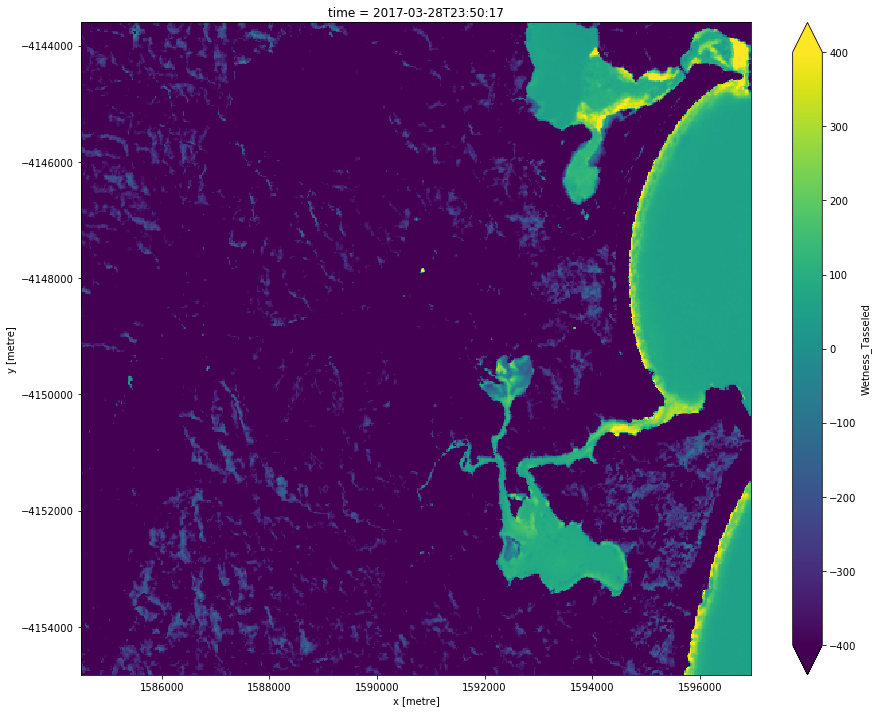

In [107]:
TasseledFisher_cap.Wetness_Tasseled.isel(time=15).plot(cmap='viridis', figsize =(15,12),vmin=-400,)

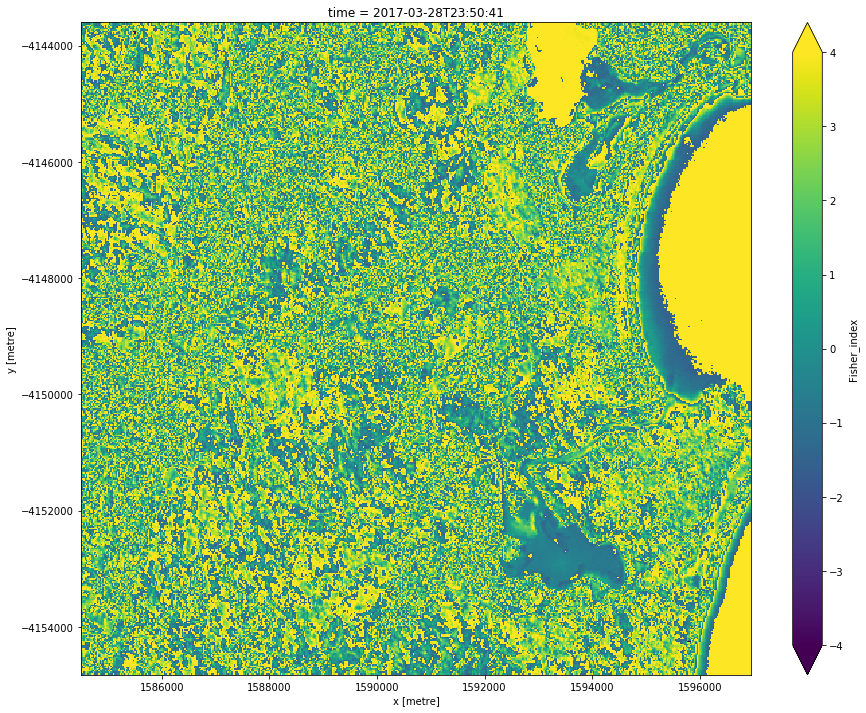

In [111]:
TasseledFisher_cap.Fisher_index.isel(time=16).plot(cmap='viridis', figsize =(15,12), vmin=-4)

In [58]:
inundated_veg_msk = (np.logical_and(lst_fisher>=-10,Tasseled_cap>=-400))
inundated_veg = lst_fisher.where(inundated_veg_msk==True,0)
inundated_veg = inundated_veg.where(inundated_veg_msk==False,1)

NameError: name 'lst_fisher' is not defined

In [15]:
wet_frequency = inundated_veg.sum(dim='time')
wet_frequency

<xarray.Dataset>
Dimensions:           (x: 498, y: 449)
Coordinates:
  * y                 (y) float64 -4.144e+06 -4.144e+06 ... -4.155e+06
  * x                 (x) float64 1.585e+06 1.585e+06 ... 1.597e+06 1.597e+06
Data variables:
    Wetness_Tasseled  (y, x) float64 1.0 1.0 0.0 0.0 1.0 ... 26.0 26.0 26.0 26.0

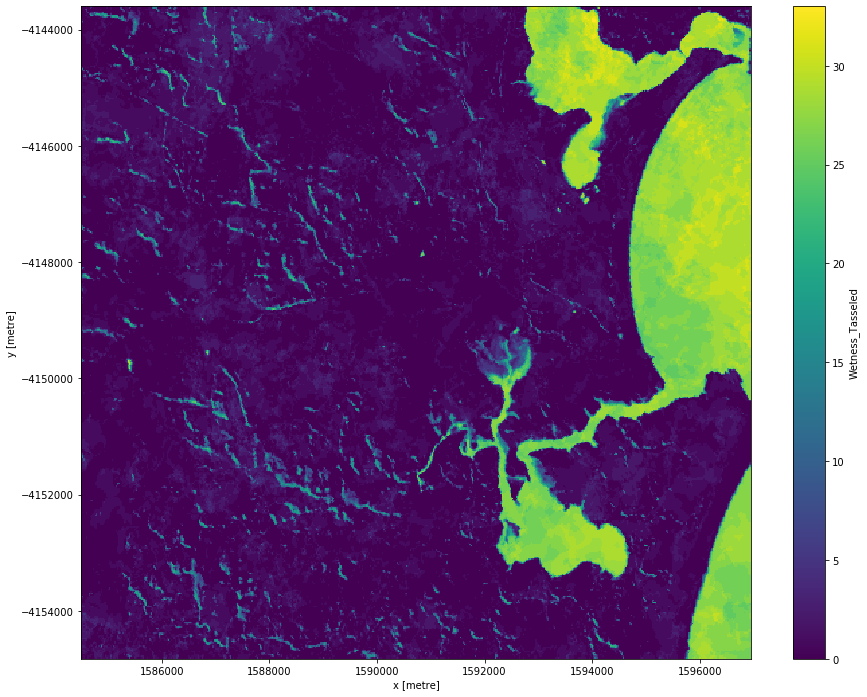

In [17]:
wet_frequency.Wetness_Tasseled.plot(cmap='viridis', figsize =(15,12))